## Task

В качестве тестового задания мы предоставляем вам датасет online_shoppers_intention.csv, который содержит информацию о посетителях интернет-магазина и их поведении на сайте. Необходимо проанализировать данный датасет, определив какие действия могут привести к конверсии и создать классификатор на основе ваших гипотез.

В качестве ответа необходимо предоставить Jupyter Notebook с вашим анализом и модель машинного обучения, которая сможет предсказывать, приносят ли действия пользователя Revenue или нет.

## Imports

In [2]:
# Data
import pandas as pd
import numpy as np

# ML
import sklearn

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


## Data Analysis

### Summary analysis

In [3]:
dataframe = pd.read_csv('online_shoppers_intention.csv')
dataframe.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3090,0,0.0,0,0.0,6,30.000000,0.183333,0.188889,0.0,0.8,May,3,2,6,1,Returning_Visitor,False,False
9096,1,67.5,1,0.0,11,816.500000,0.000000,0.016667,0.0,0.0,Dec,1,1,6,2,New_Visitor,False,False
10265,0,0.0,2,84.5,42,2762.408333,0.004545,0.025152,0.0,0.0,Nov,2,2,1,2,New_Visitor,False,False
8104,0,0.0,0,0.0,8,135.250000,0.000000,0.050000,0.0,0.0,Nov,2,2,9,1,Returning_Visitor,False,False
2121,0,0.0,0,0.0,5,74.500000,0.000000,0.080000,0.0,0.6,May,1,1,1,3,Returning_Visitor,False,False


Для большего понимания признаков был найден [источник](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset) данного датасета

Далее расписаны наиболее специфичные их них

"**Administrative**", "**Administrative Duration**", "**Informational**", "**Informational Duration**", "**Product Related**" и "**Product Related Duration**" представляют собой количество различных типов страниц, посещенных посетителем за один сеанс, и общее время, проведенное в каждой из этих категорий страниц.

Параметр "**Bounce Rate**" для веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают ("bounce"), не инициируя никаких других запросов к серверу аналитики во время этого сеанса. 

Параметр "**Exit Rate**" для конкретной веб-страницы рассчитывается как для всех просмотров страницы на странице процент, которые были последними в сеансе. 

Параметр "**Page Value**" представляет собой среднюю ценность веб-страницы, которую пользователь посетил до завершения транзакции электронной торговли. 

Параметр "**Special Day**" указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню святого Валентина), когда сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учетом динамики электронной торговли, такой как продолжительность между датой заказа и датой доставки. Например, для дня Валентины это значение принимает ненулевое значение между 2 и 12 февраля, ноль до и после этой даты, если только она не близка к другому особому дню, и максимальное значение 1 приходится на 8 февраля.

Рассмотрим есть ли пропущеные значения и каких типов бывают признаки в данном датасете

In [4]:
dataframe.info()

cat_cols = list(dataframe.select_dtypes(exclude='number').columns)
num_cols = list(dataframe.select_dtypes(include='number').columns)
print(f'All categorical features: {", ".join(cat_cols)}')
print(f'All numerical features: {", ".join(num_cols)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Из полученных результатов видно, что нет пропущеных значений, а также имеется 8 категориальных признаков (Month, VisitorType, Weekend, Revenue, OperatingSystems, Browser, Region, TrafficType), из которых 4 последних уже закодированы LabelEncoder'ом.

In [5]:
dataframe.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Из сводной таблици видно, что большинство численных признаков распределены в близи нуля, например Administrative,  Administrative_Duration, Informational, Informational_Duration, PageValues

Для более детального анализа рассмотрим каждый из признаков отдельно.

### Descriptive analysis

<Axes: xlabel='Administrative'>

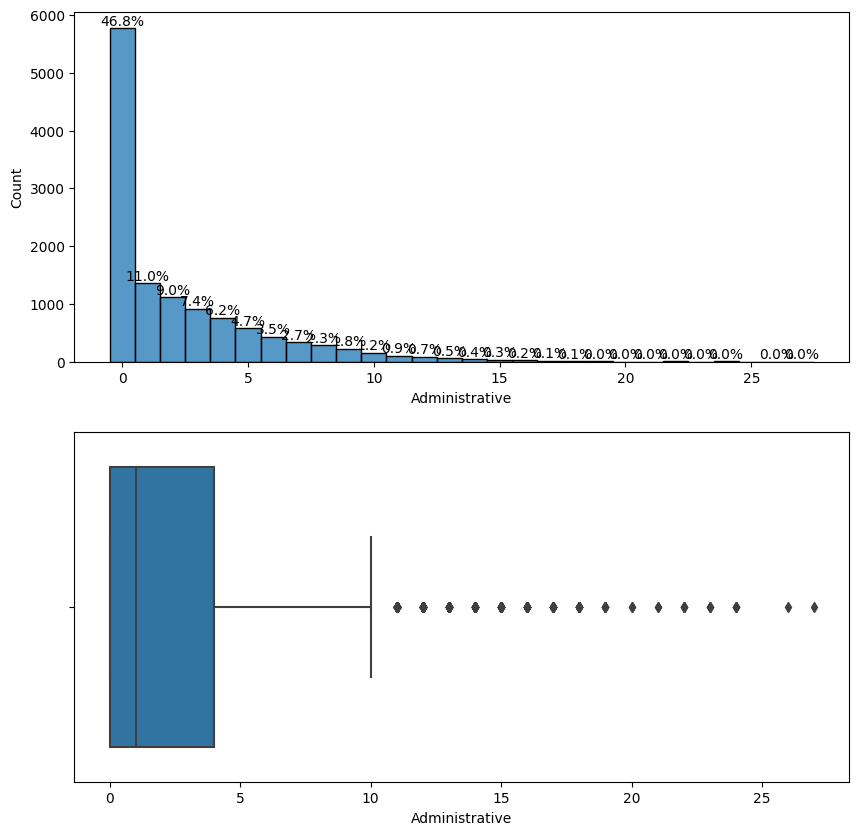

In [66]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

hist = sns.histplot(data=dataframe, x="Administrative", discrete=True, ax=ax1)
labels = [f'{v.get_height() / len(dataframe) * 100:.1f}%' if v.get_height() != 0 else '' for v in hist.patches]
hist.bar_label(hist.containers[1], labels=labels)

sns.boxplot(data=dataframe, x="Administrative", ax=ax2)

<Axes: xlabel='Administrative_Duration'>

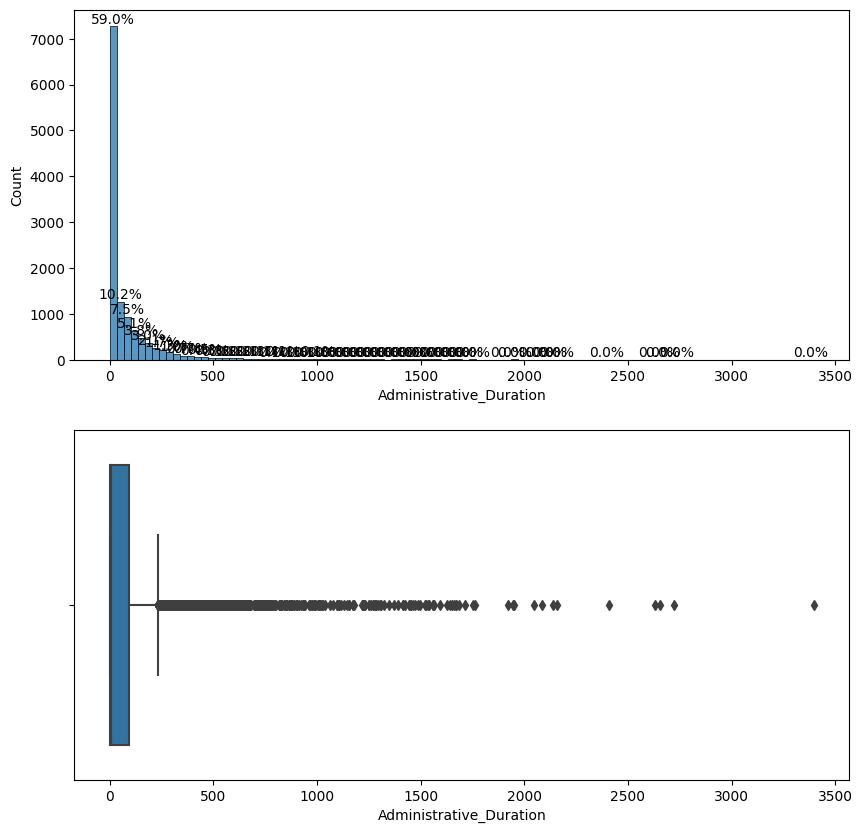

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

hist = sns.histplot(data=dataframe, x="Administrative_Duration", bins=100, ax=ax1)
labels = [f'{v.get_height() / len(dataframe) * 100:.1f}%' if v.get_height() != 0 else '' for v in hist.patches]
hist.bar_label(hist.containers[1], labels=labels)

sns.boxplot(data=dataframe, x="Administrative_Duration", ax=ax2)

<Axes: xlabel='Administrative', ylabel='Administrative_Duration'>

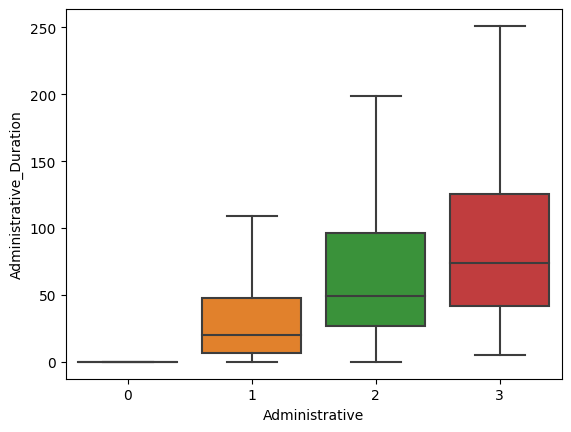

In [17]:
sns.boxplot(data=dataframe[dataframe["Administrative"] <= 3], y="Administrative_Duration", x="Administrative", showfliers=False)

<Axes: xlabel='Administrative', ylabel='Administrative_Duration'>

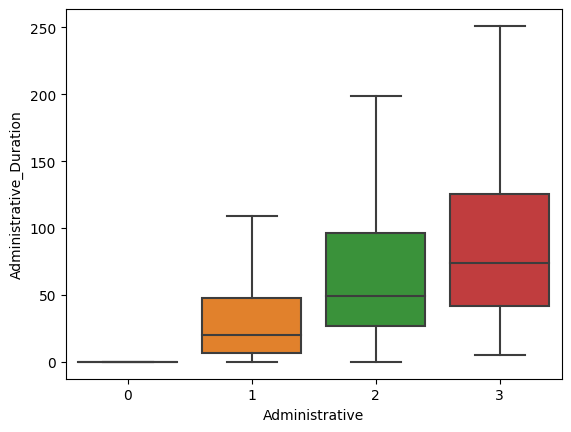

In [47]:
sns.boxplot(data=dataframe[dataframe["Administrative"] <= 3], y="Administrative_Duration", x="Administrative", showfliers=False)

По двум данным признакам заметно, что большинство пользователей не посещают административные страницы. Вероятнее всего в случае одного посещения данное действие было случайным, так как по последнему графику заметно, что медниана времени находится в районе 25 секунд. 

<Axes: xlabel='Informational'>

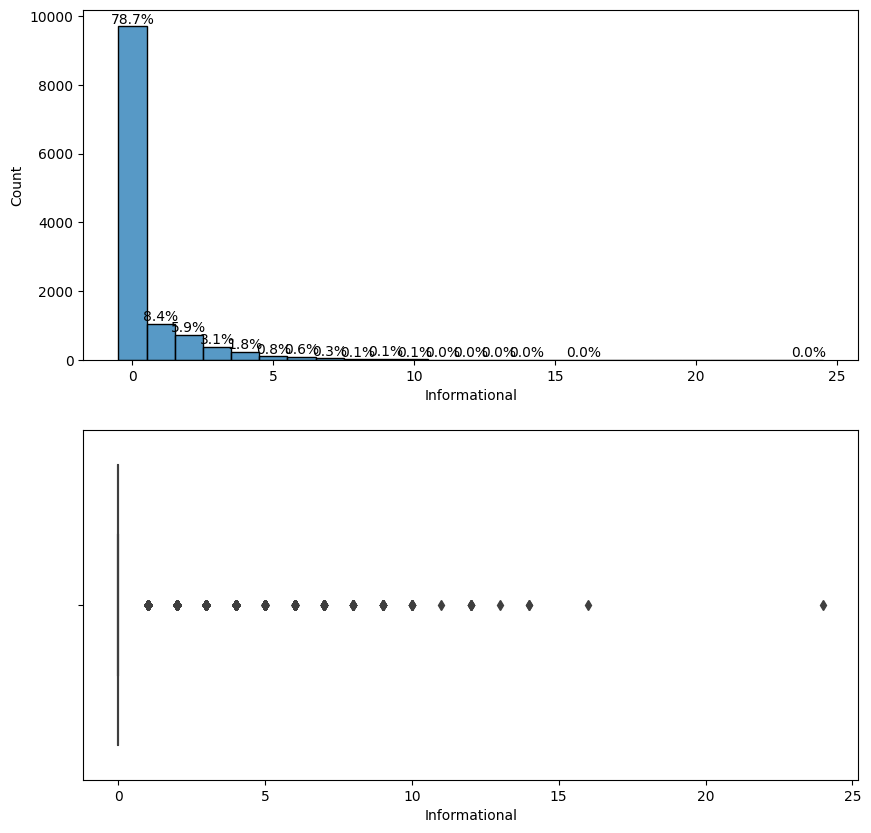

In [68]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

hist = sns.histplot(data=dataframe, x="Informational", discrete=True, ax=ax1)
labels = [f'{v.get_height() / len(dataframe) * 100:.1f}%' if v.get_height() != 0 else '' for v in hist.patches]
hist.bar_label(hist.containers[1], labels=labels)

sns.boxplot(data=dataframe, x="Informational", ax=ax2)

<Axes: xlabel='Informational_Duration'>

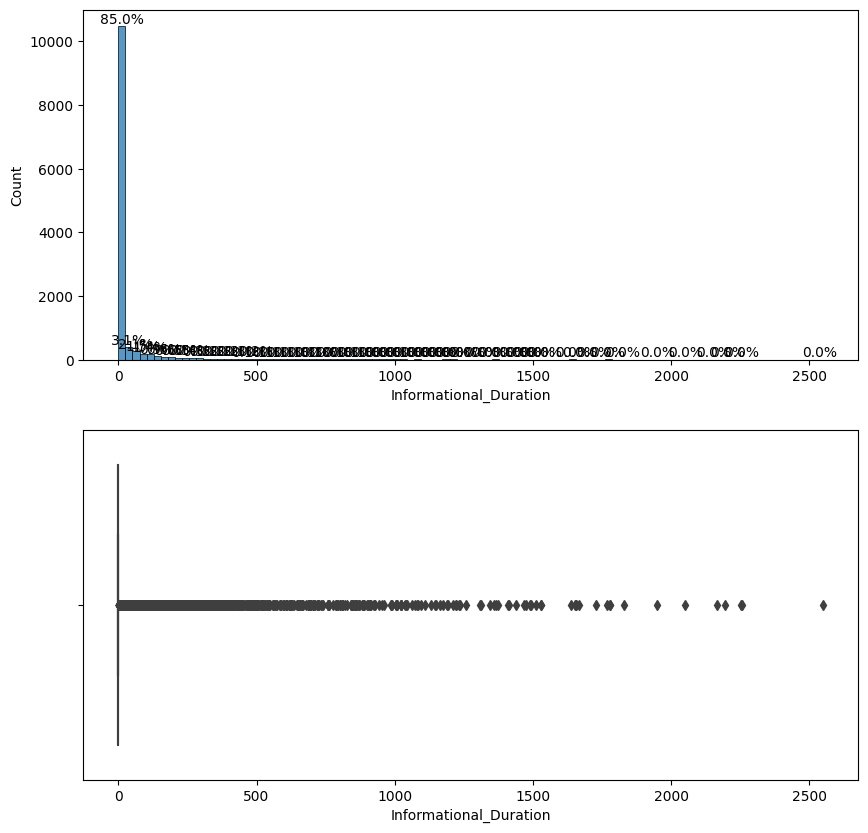

In [69]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

hist = sns.histplot(data=dataframe, x="Informational_Duration", bins=100, ax=ax1)
labels = [f'{v.get_height() / len(dataframe) * 100:.1f}%' if v.get_height() != 0 else '' for v in hist.patches]
hist.bar_label(hist.containers[1], labels=labels)

sns.boxplot(data=dataframe, x="Informational_Duration", ax=ax2)

<Axes: xlabel='Informational', ylabel='Informational_Duration'>

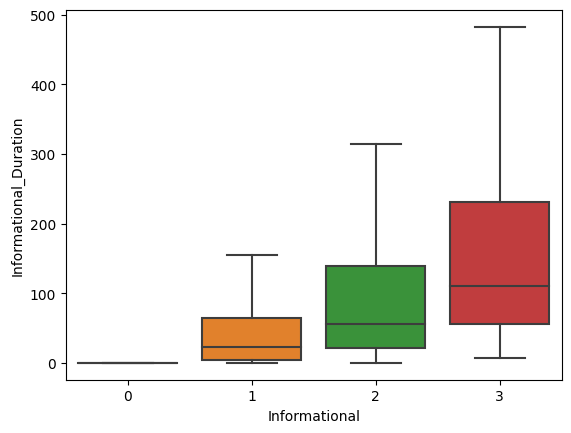

In [70]:
sns.boxplot(data=dataframe[dataframe["Informational"] <= 3], y="Informational_Duration", x="Informational", showfliers=False)

В случае информационных страниц ситуация более четкая, более 85% ни разу не посетили данную страницу. Однако с ростом числа посещений время проведенное на данных страницах растет значительнее в сравнении с административными, и рассматривать их как случайные посещения нет смысла

<Axes: xlabel='ProductRelated'>

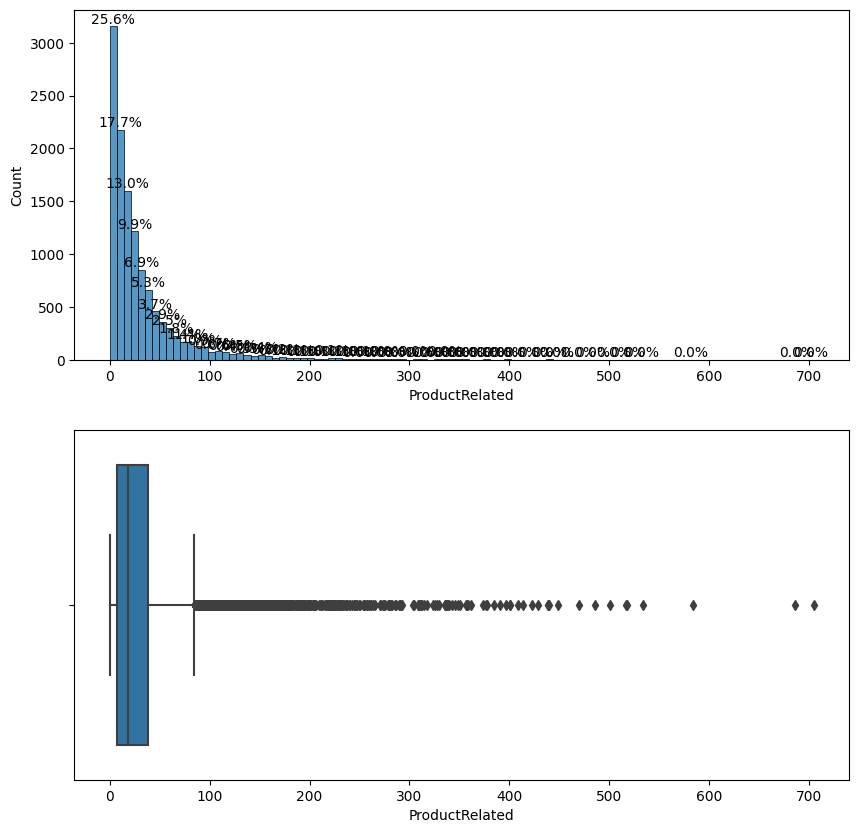

In [83]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

hist = sns.histplot(data=dataframe, x="ProductRelated", bins=100, ax=ax1)
labels = [f'{v.get_height() / len(dataframe) * 100:.1f}%' if v.get_height() != 0 else '' for v in hist.patches]
hist.bar_label(hist.containers[1], labels=labels)

sns.boxplot(data=dataframe, x="ProductRelated", ax=ax2)

<Axes: xlabel='ProductRelated_Duration'>

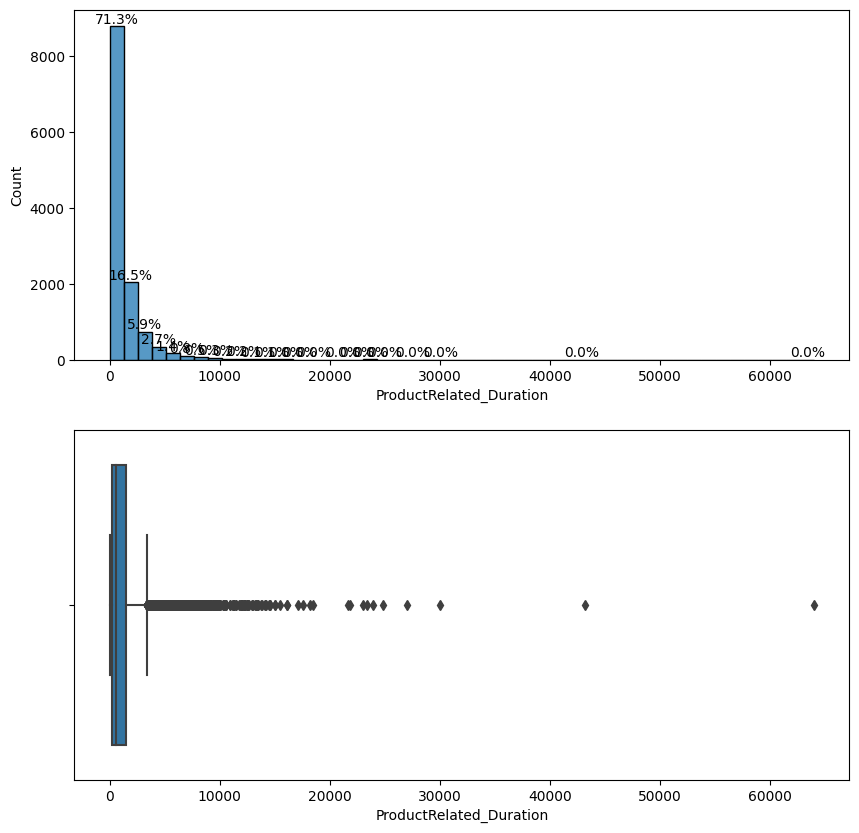

In [86]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

hist = sns.histplot(data=dataframe, x="ProductRelated_Duration", bins=50, ax=ax1)
labels = [f'{v.get_height() / len(dataframe) * 100:.1f}%' if v.get_height() != 0 else '' for v in hist.patches]
hist.bar_label(hist.containers[1], labels=labels)

sns.boxplot(data=dataframe, x="ProductRelated_Duration", ax=ax2)

В отличии от предыдущих параметров, ProductRelated показывает наиболее высокие показатели, как и с точки зрения количесва посещений, так и с точки зрения времени, проведенного на данных сайтах

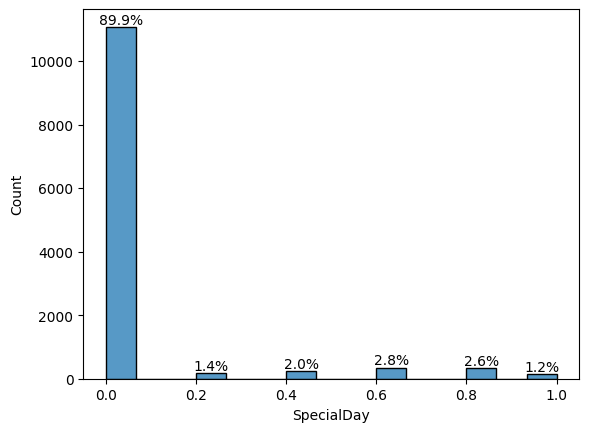

In [110]:
hist = sns.histplot(data=dataframe, x="SpecialDay")
labels = [f'{v.get_height() / len(dataframe) * 100:.1f}%' if v.get_height() != 0 else '' for v in hist.patches]
hist.bar_label(hist.containers[1], labels=labels)
plt.show()

Только около 10% покупок связаны с праздниками

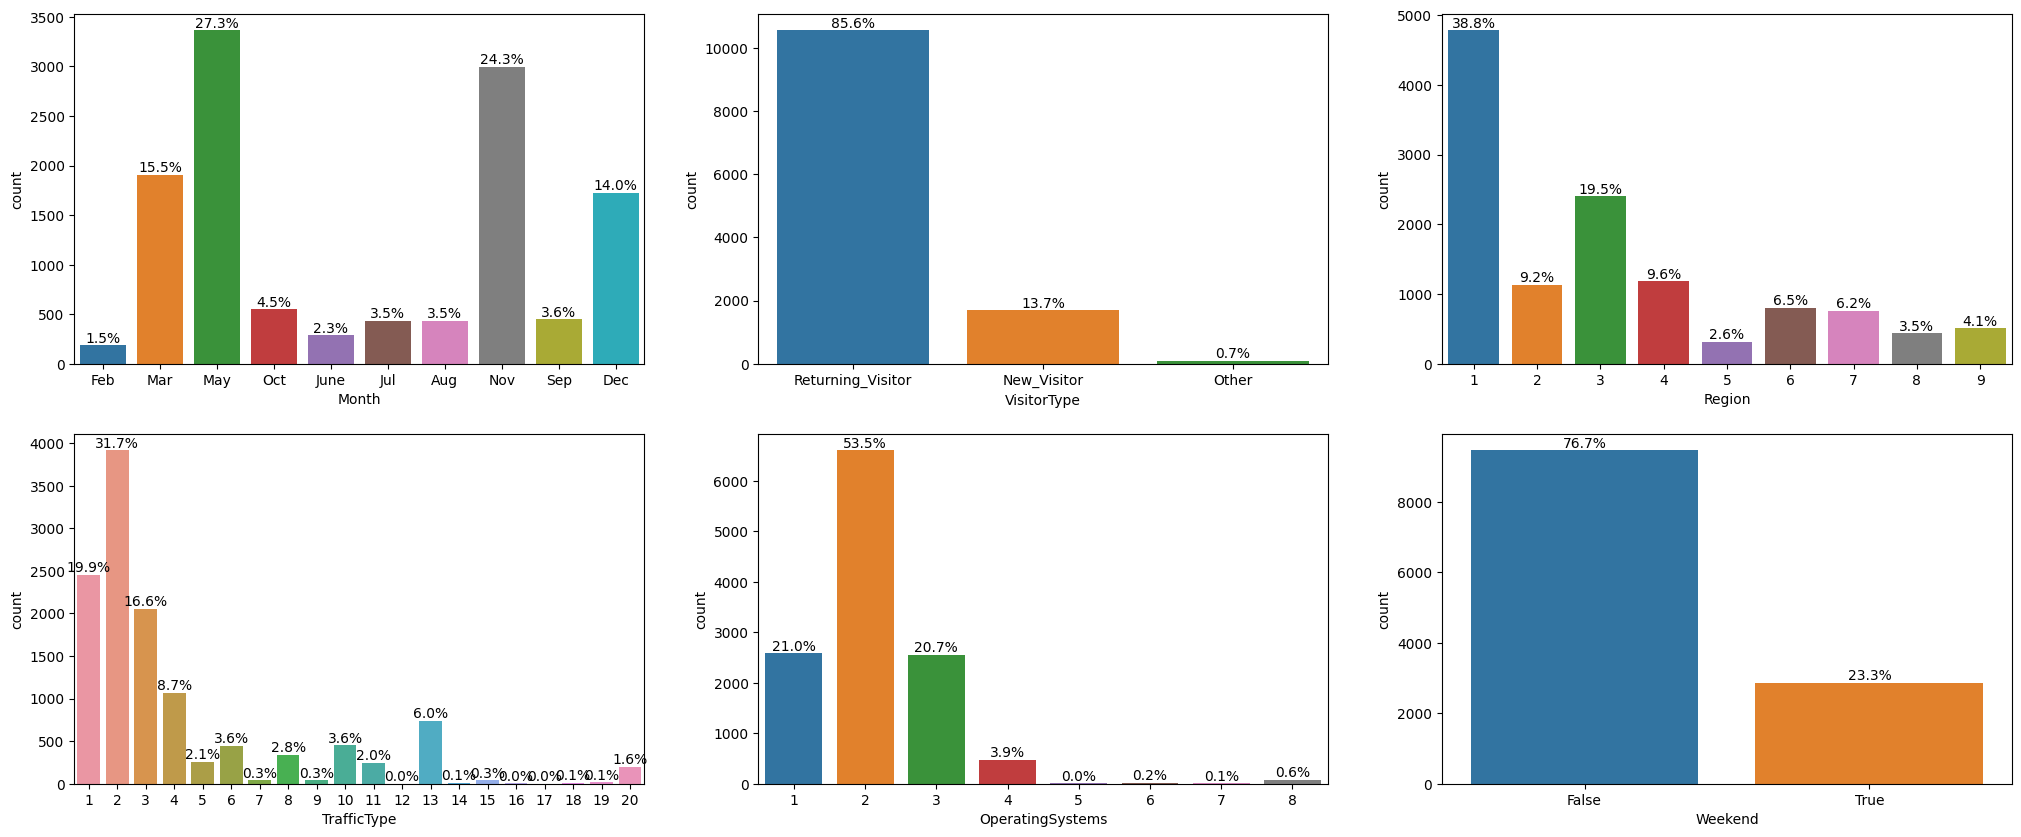

In [111]:
left_features = ['Month', 'OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

fig, axs = plt.subplots(2, 3, figsize=(25, 10))

for i, feature in enumerate(left_features):
    hist = sns.countplot(data=dataframe, x=feature, ax=axs[i%2][i%3])
    labels = [f'{v.get_height() / len(dataframe) * 100:.1f}%' if v.get_height() != 0 else '' for v in hist.patches]
    hist.bar_label(hist.containers[0], labels=labels)


Далее представлены анализ графиков слева на право, сверху вниз:
- В 'Month' отсутствует пару месяцев (Январь, Апрель)
- Большинство посетителей уже бывали на сайте (далее посмотрю сколько из них совершили покупку). Низкий показатель новых покупателей говорит о возможном низком притоке клиентов, возможно стоит рассмотреть какой-то способ привлечения новый людей.
- В данном тестовом задании 'Region' является не очень информативным признаком, даже если он будет сильно влиять на качество модели дать интерпритацию данному признаку невозможно. Как и с предыдущим пунктом имеет смысл привлечь пользователей из других регионов.
- Подробной информации о признаке 'TrafficType' я не смог найти(
- Наиболее популярные операционные системы 2, 1, 3 в порядке убывания (вероятнее всего информация о браузере излишняя и только конкретизации рынка и деталей сферы могла бы дать понимание важности данного признака)
- Большинство покупок совершено в выходныее дни. Возможно стоит предлагать рекламу именно в эти дни. (Далее посмотрю сколько из них совершили покупку)

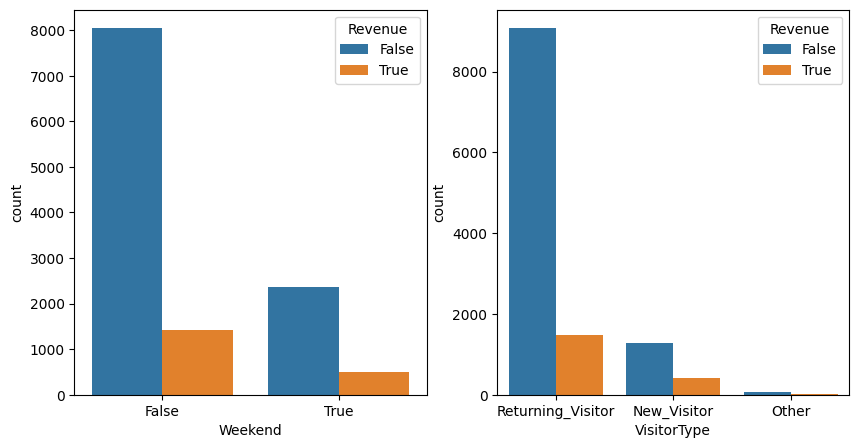

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=dataframe, x="Weekend", hue="Revenue", ax=ax1)
sns.countplot(data=dataframe, x="VisitorType", hue="Revenue", ax=ax2)
plt.show()

Из этих графиков видно, что покупательная способность, в процентном соотношении не зависит от дня недели.

Однако, второй график показывает, что покупательная способность возвращающихся покупателей в разы мешьше, чем новых.

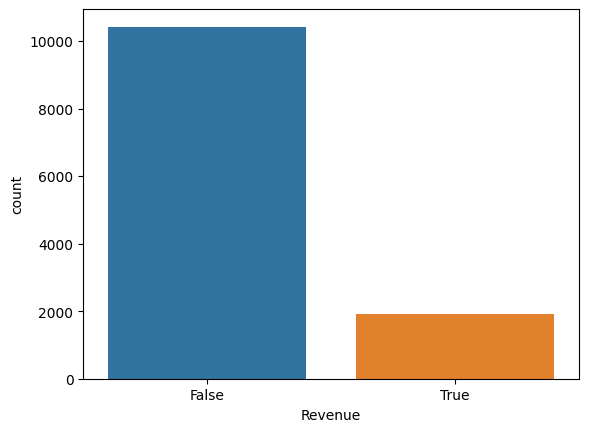

In [128]:
sns.countplot(data=dataframe, x="Revenue")
plt.show()

Также важно показать, что датасет значительно смещен в пользу класса 'Revenue'=False